**ECE 201 – Introduction to Signals and Systems**


Project Part 3


Fall 2024


1. Define a time vector for the received data. Plot the received data as a function of time. Also plot its
two-sided spectrogram of the received data. What do you observe?

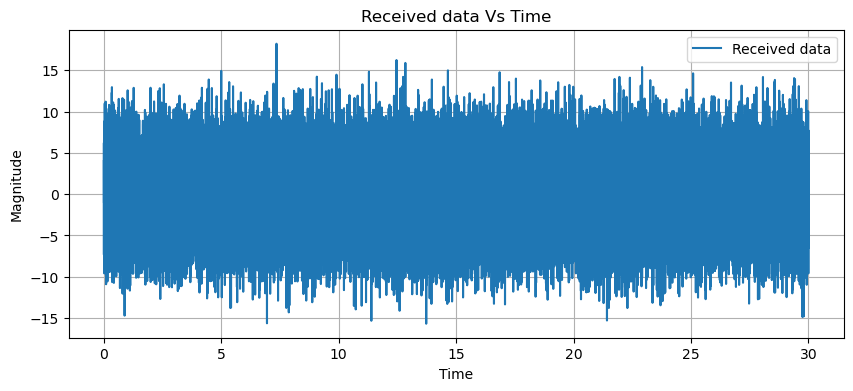

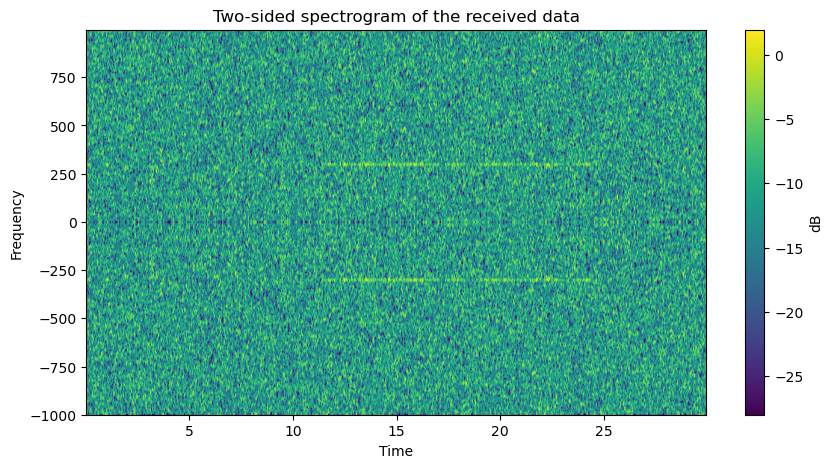

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin, freqz

%matplotlib inline

indatafile = 'proj_part3.npz'
npz_file = np.load(indatafile)
fs = npz_file['fs']
fc = npz_file['fc']
starttime = npz_file['starttime']
reception = npz_file['reception'][0, :]

# Time vector part
tt = np.arange(0, len(reception)) / fs





# Helper function in instructions of project 3 to plot spectrogram
def plot_spectrogram(sigforspecgram, fs, title):
    tblock = 0.1  
    dB_dynrange = 30  
    nfft = 512  
    nblock = np.rint(tblock * fs).astype(int)  

    fig, ax = plt.subplots(figsize=(10, 5))
    spec, freqs, tspec, im = plt.specgram(
        sigforspecgram,
        NFFT=nblock,
        Fs=fs,
        pad_to=nfft,
        mode="magnitude",
        scale="dB",
        sides="twosided",
    )
    maxval = 20 * np.log10(spec.max())
    plt.clim(maxval - dB_dynrange, maxval)
    plt.colorbar(label="dB")
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency")
    ax.set_title(title)
    plt.show()
    
    
    

    
#  Plotting the received data as a function of time
plt.figure(figsize=(10, 4))
plt.plot(tt, reception, label="Received data")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Received data Vs Time")
plt.grid()
plt.legend()
plt.show()

# Plotting its two-sided spectrogram of the received data
plot_spectrogram(reception, fs, "Two-sided spectrogram of the received data")

Recived data in time domain is noisy and no data can be detceted in this initial state. Demodulation and filtering is obsviously needed to get useful information if there is any from this noisy recived data.
From spectrum, 2 stronger lines can be detcted at 250 Hz at both sides of 0 Hz which means the frequancy for demodulation should be 250 Hz. (Carrier Freq. = 250 Hz)

2. Demodulate the data by multiplying by the appropriate cosine signal. Plot the two-sided spectrogram of
the signal after multiplication by the cosine. Do you see what you expect to see?

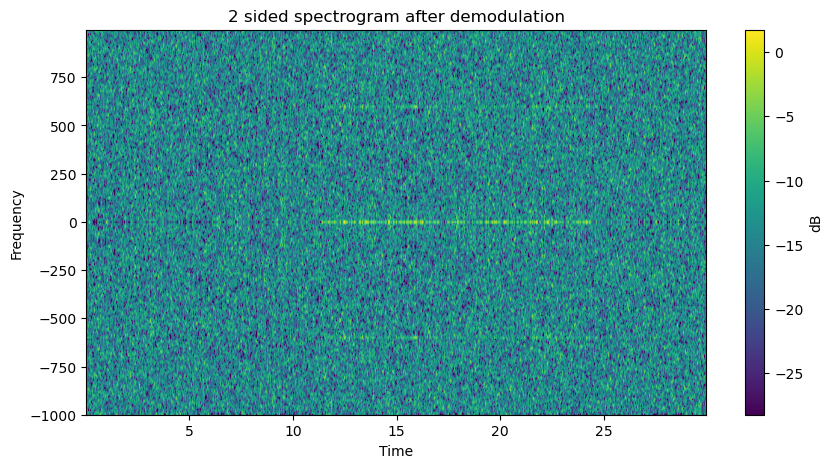

In [3]:
# Demodulating the data by multiplying by the appropriate cosine signal (which we answered is 250 Hz in previous part)
carrier = np.cos(2 * np.pi * fc * tt)
demodulated_signal = reception * carrier

# Plotting the two-sided spectrogram of the signal after multiplication by the cosine
plot_spectrogram(demodulated_signal, fs, "2 sided spectrogram after demodulation")

As we can see, now the strong string is at 0 Hz and has moved from -+250 Hz which shows DEMODULATION was successful which is exactly what we expected to see.

3. To complete the demodulation process, you need to pass the demodulated signal through a lowpass filter.
Design a lowpass filter to have a cutoff frequency equal to 0.125 times the sample frequency. Make a plot
of the impulse response of the filter you design and its frequency response.


C:\Users\ASUS  N551JW\AppData\Local\Temp\ipykernel_11500\2547520781.py:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lpf, use_line_collection=True)


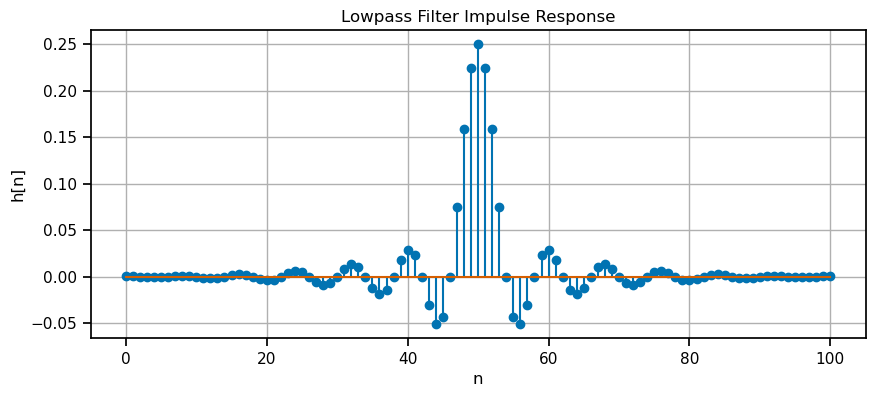

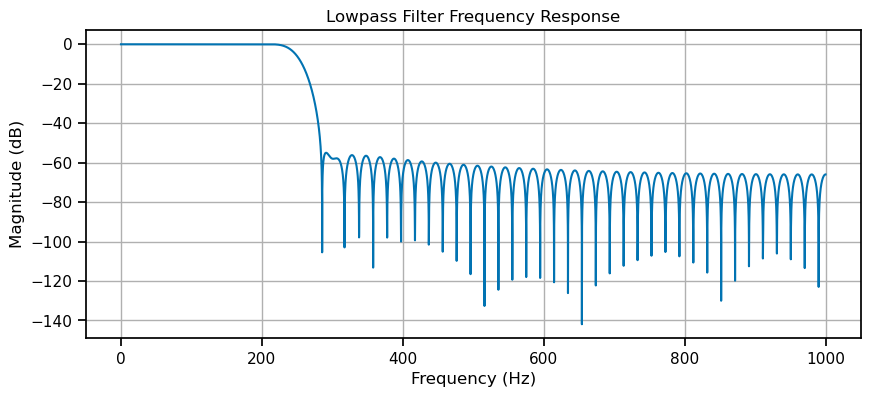

In [7]:
# Fequency Response of LPF s we can use (We will use this LPF)

from scipy.signal import firwin, freqz

cutoff = 0.125 * fs  # Cutoff Freq.
numtaps = 101

lpf = firwin(numtaps, cutoff / (fs / 2), window='hamming')

plt.figure(figsize=(10, 4))
plt.stem(lpf, use_line_collection=True)
plt.title("Lowpass Filter Impulse Response")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid()
plt.show()

freq, response = freqz(lpf, worN=8000, fs=fs)
plt.figure(figsize=(10, 4))
plt.plot(freq, 20 * np.log10(np.abs(response)))
plt.title("Lowpass Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

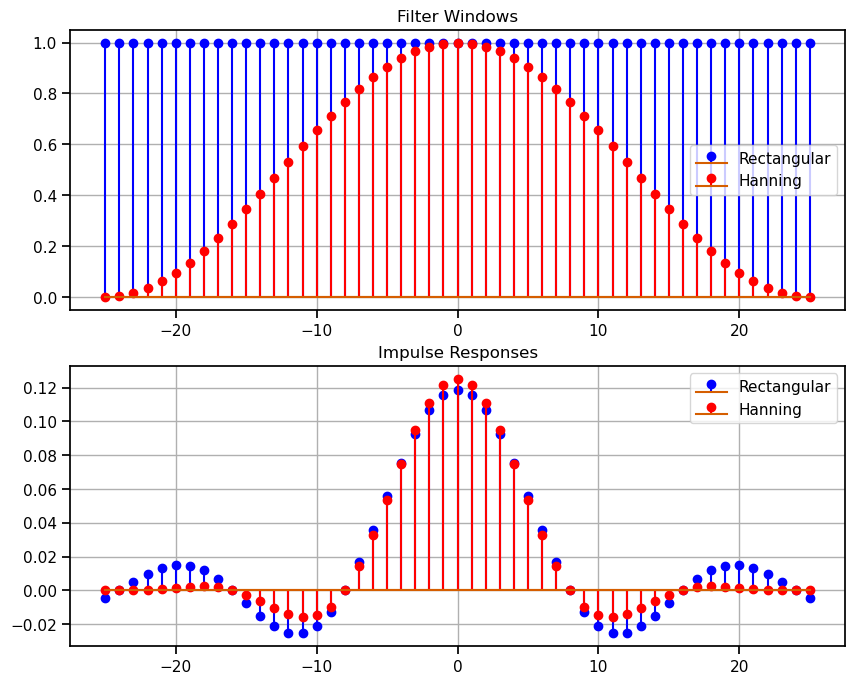

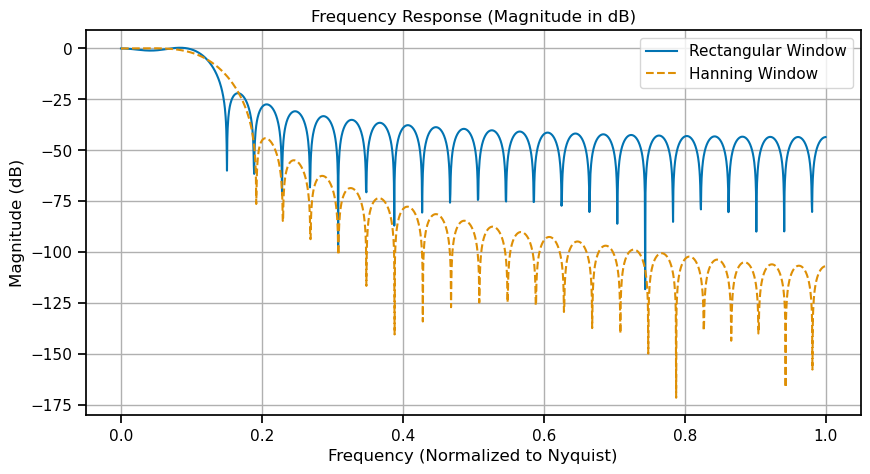

In [6]:
# Additional Filters and impulse responses ( Mentioned in instruction Lab files)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin, freqz

%matplotlib inline

sns.set_context("notebook")
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (8, 5.5)

numtaps = 51  
fcutoff = 0.125 

hlpfrect = firwin(numtaps, fcutoff, window='boxcar')  # Rectangular window
hlpfhann = firwin(numtaps, fcutoff, window='hann')  # Hanning window

lpfdelay = (numtaps - 1) / 2
n = np.arange(-lpfdelay, lpfdelay + 1, 1)  

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

winrect = np.ones(numtaps)  # Rectangular window
winhann = np.hanning(numtaps)  # Hanning window
ax[0].stem(n, winrect, linefmt='b', markerfmt='bo', label="Rectangular")
ax[0].stem(n, winhann, linefmt='r', markerfmt='ro', label="Hanning")
ax[0].set_title("Filter Windows")
ax[0].legend()
ax[0].grid()

# Plottin the impulse responses
ax[1].stem(n, hlpfrect, linefmt='b', markerfmt='bo', label="Rectangular")
ax[1].stem(n, hlpfhann, linefmt='r', markerfmt='ro', label="Hanning")
ax[1].set_title("Impulse Responses")
ax[1].legend()
ax[1].grid()

plt.show()

freq, Hwrect = freqz(hlpfrect, worN=2048)
freq, Hwhann = freqz(hlpfhann, worN=2048)

plt.figure(figsize=(10, 5))
plt.plot(freq / np.pi, 20 * np.log10(np.abs(Hwrect)), label="Rectangular Window")
plt.plot(freq / np.pi, 20 * np.log10(np.abs(Hwhann)), label="Hanning Window", linestyle='--')
plt.title("Frequency Response (Magnitude in dB)")
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency (Normalized to Nyquist)")
plt.legend()
plt.grid()
plt.show()

4. Pass the signal through your lowpass filter and plot the two-sides spectrogram. Do you see what you
expect to see?

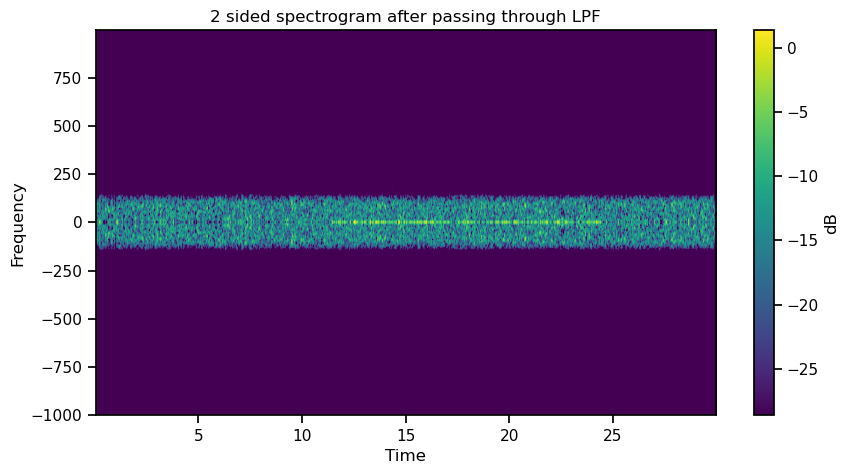

In [12]:
from scipy.signal import lfilter

numtaps = 51 
fcutoff = 0.125
hlpfrect = firwin(numtaps, fcutoff, window="boxcar")  # Rectangular window

# Passing the signal through our LPF as asked
filtered_signal = lfilter(hlpfrect, 1.0, demodulated_signal)

# Plotting the two-sides spectrogram
plot_spectrogram(filtered_signal, fs, "2 sided spectrogram after passing through LPF")

Just as we expected, the LPF has only let the low frequnecy part of our data pass and it has omitted the higher frequncies. Since we have demodulated the signal in previous part, we only had data around 0 Hz in lower frequancies which means the output of LPF right now is the excat data which we wanted.

5. Use the matched filter you designed in part 2 for the 13-second Barker pulse to process your signal. Plot
the two-sided spectrogram of the matched filtered signal. What do you observe?

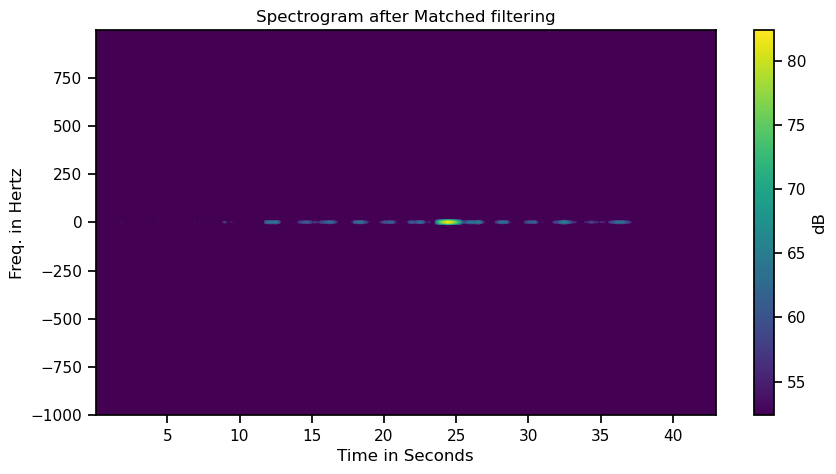

In [20]:
sigduration = 13
tt13 = np.arange(0, sigduration, 1/fs)

# b13 from part 2 of project
b13=1*((tt13>=0) & (tt13<=5))-1*((tt13>=5) & (tt13<=7)) +1*((tt13>=7) & (tt13<=9))-1*((tt13>=9) & (tt13<=10))+1*((tt13>=10) & (tt13<=11))-1*((tt13>=11) & (tt13<=12))+1*((tt13>=12) & (tt13<=13))

rect13=np.ones(len(tt13))
hmf=b13[::-1] # This is the matched filter of b 13





# Matched filtering
matched_filter_output = np.convolve(filtered_signal, hmf, mode='full')


dB_dynrange=30
nfft=512
tblock=0.1
nblock=np.rint(tblock*fs).astype(int)
plt.figure(figsize=(10, 5))
spec, freqs, tspec, im = plt.specgram(matched_filter_output, NFFT=nblock, Fs=fs, pad_to=nfft, mode='magnitude', scale='dB', sides='twosided')
maxval = 20 * np.log10(spec.max())
plt.colorbar(im, label='dB')
plt.clim(maxval - dB_dynrange, maxval)
plt.xlabel("Time in Seconds")
plt.ylabel("Freq. in Hertz")
plt.title("Spectrogram after Matched filtering")
plt.show()





We can observe that output of matched filtering has a peak at around 25 seconds in 0 Hz frequency.

6. Now plot the output of the matched filter as a function of time. Define a time axis (in seconds) for
plotting the signal using what you know about the sample frequency. You should compensate for the
delay through the lowpass filter. To do this, you’ll define a time vector and then subtract the delays
through the filter from your time vector.

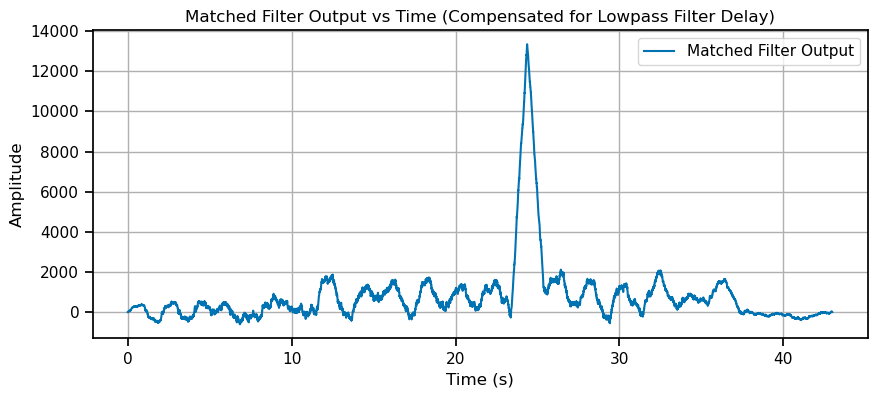

In [24]:
lpfdelay = (numtaps - 1) / 2  # Delay through LPF

matched_filter_time = np.arange(0, len(matched_filter_output)) / fs - lpfdelay / fs
e
plt.figure(figsize=(10, 4))
plt.plot(matched_filter_time, matched_filter_output, label="Matched Filter Output")
plt.xlabel("Time")
plt.ylabel("Magniitude")
plt.title("Matched Filter Output vs Time (Compensated for Lowpass Filter Delay)")
plt.grid()
plt.legend()
plt.show()

7. Find the peak of your matched filtered output. The time associated with this peak arrival is the arrival
time of the signal. What is that equal to in seconds?


In [26]:
arrival_index = np.argmax(matched_filter_output)
arrival_time = matched_filter_time[arrival_index]

print(f"Estimated Arrival Time: {arrival_time:.5f} seconds")

Estimated Arrival Time: 24.36150 seconds


As we expcted, peak arrival time is ariund 25 seconds.

8. Summarize what you have learned about demodulation and filtering from this part of the project.

Demodulation is basically the process of shifting a modulated signal to baseband (0 Hz) and it is done by multiplying the received signal with a cosine wave of the carrier frequency. This shifts the signal's energy to both positive and negative frequencies like we saw using a two-sided spectrogram. But as we saw, demodulation still had and caused high-frequency artifacts which reqiured some lowpass filtering to isolate the baseband signal. Filters also introduced delays that required compensation for accurate time-based analysis. Matched filtering that is convolving the received signal with a time-reversed known signal improved the signal-to-noise ratio (SNR) and was crucial for accurate time-of-arrival estimation. The combination of demodulation, filtering and matched filtering  with the insightful use of spectrograms caused the accurate extraction and analysis of the Barker sequence even in a noisy environment.